In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

In [2]:
def read_all_scalars(log_path):
    ea = event_accumulator.EventAccumulator(log_path,
        size_guidance={
            event_accumulator.SCALARS: 0,
        })
    ea.Reload() # loads events from file
    tags = ea.Tags()["scalars"]
    metrics = {
        
    }
    for tag in tags:
        metrics[tag] = ea.Scalars(tag)

    return metrics

In [44]:
# Set the path to your tensorboard log

scalars = read_all_scalars("../outputs/rdd2020/tf_logs/events.out.tfevents.1619092481.LAPTOP-U8LOLA1H.87512.0")
scalars2 = read_all_scalars("../outputs/rdd2020/tf_logs/events.out.tfevents.1619092059.jupyter_fredralm.1620.0")
scalars3 = read_all_scalars("../outputs/rdd2020_338x600_wide/tf_logs/events.out.tfevents.1619125472.jupyter_fredralm.1998.0")
scalars4 = read_all_scalars("../outputs/rdd2020_338x600_wide/tf_logs/events.out.tfevents.1619169385.jupyter_fredralm.337.0")


In [45]:
print("Possible scalars to plot:")
for tag in scalars.keys():
    print("\t", tag)

Possible scalars to plot:
	 losses/total_loss
	 losses/reg_loss
	 losses/cls_loss
	 lr


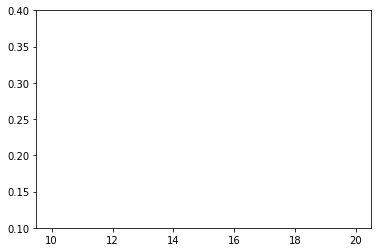

In [46]:
tag_to_plot = "losses/total_loss"
values = scalars[tag_to_plot]
iterations = [val.step for val in values]
values = [val.value for val in values]
plt.ylim([0.1, 0.4])
plt.plot(iterations, values)
#plt.savefig('mAP_task4f.png')

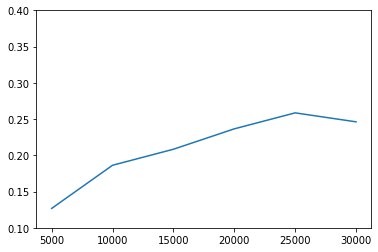

In [27]:
tag_to_plot = "metrics/rdd2020_val/mAP"
values = scalars3[tag_to_plot] + scalars4[tag_to_plot]
iterations = [val.step for val in values]
values = [val.value for val in values]
plt.ylim([0.1, 0.4])
plt.plot(iterations, values)
#plt.savefig('mAP_task4f.png')

In [9]:
%load_ext tensorboard

In [1]:
%load_ext tensorboard
%tensorboard --logdir TDT4265-StarterCode/Project/SSD/outputs/rdd2020_460x260/tf_logs
